# MoCo-v2+v1: Data Augmentation & Visualization

- __Momentum Contrast for Unsupervised Visual Representation Learning__ by Kaiming He et al.

- __Improved Baselines with Momentum Contrastive Learning__ by Xinlei Chen et al.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from moco_data_augmentation import get_stl10_dataset

/home/majumdar/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
# Path to STL-10 (unlabeled 100k images) dataset-
path_to_stl10 = "/home/majumdar/Downloads/.data/stl10_binary/"
batch_size = 64
data_augmentation = 'mocov2'

In [3]:
# Get STL-10 unlabeled dataset-
train_dataset, train_loader = get_stl10_dataset(
    # rank = device, world_size = world_size,
    batch_size = batch_size, num_workers = 0,
    pin_memory = False, path_to_stl10 = path_to_stl10,
    augmentation = data_augmentation
)

In [4]:
x1, x2 = next(iter(train_loader))

In [5]:
print(f"x1.size: {x1.size()} & x2.size: {x2.size()}")

x1.size: torch.Size([64, 3, 96, 96]) & x2.size: torch.Size([64, 3, 96, 96])


In [6]:
x1.min(), x1.max()

(tensor(-2.1179), tensor(2.6400))

In [7]:
x2.min(), x2.max()

(tensor(-2.1179), tensor(2.6400))

In [8]:
# De-normalize images for visualization-
# https://discuss.pytorch.org/t/simple-way-to-inverse-transform-normalization/4821/3
invTrans = transforms.Compose(
    [
        transforms.Normalize(
            mean = [0., 0., 0.],
            std = [1 / 0.229, 1 / 0.224, 1 / 0.225]
        ),
        transforms.Normalize(
            mean = [-0.485, -0.456, -0.406],
            std = [1., 1., 1.]
        ),
    ]
)

In [9]:
x1_vis = invTrans(x1)
x2_vis = invTrans(x2)

In [10]:
# For visualization-
x1_vis = torch.permute(x1_vis, (0, 2, 3, 1))
x2_vis = torch.permute(x2_vis, (0, 2, 3, 1))

x1_vis.size(), x2_vis.size()

(torch.Size([64, 96, 96, 3]), torch.Size([64, 96, 96, 3]))

In [11]:
x1_vis.min(), x1_vis.max()

(tensor(0.), tensor(1.))

In [12]:
x2_vis.min(), x2_vis.max()

(tensor(0.), tensor(1.))

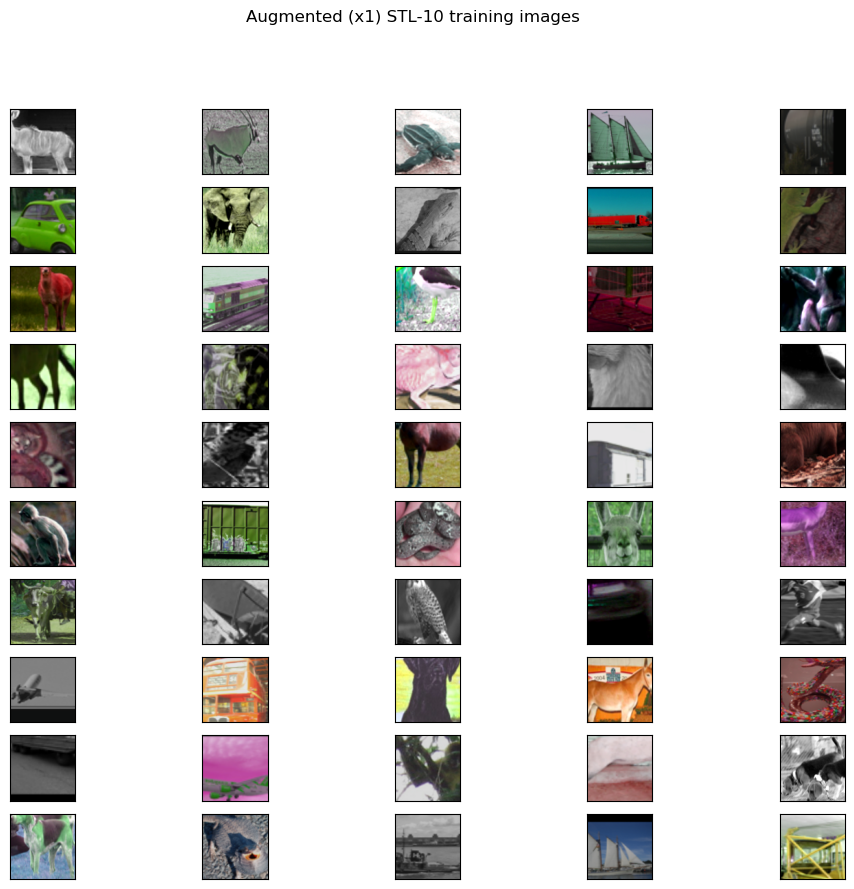

In [13]:
# Visualize MoCo-v2 augmented images train images-
plt.figure(figsize = (12, 10))

for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.imshow(x1_vis[i])
    # get current axes-
    ax = plt.gca()

    # hide x-axis-
    ax.get_xaxis().set_visible(False)

    # hide y-axis-
    ax.get_yaxis().set_visible(False)

plt.suptitle("Augmented (x1) STL-10 training images")
plt.show()

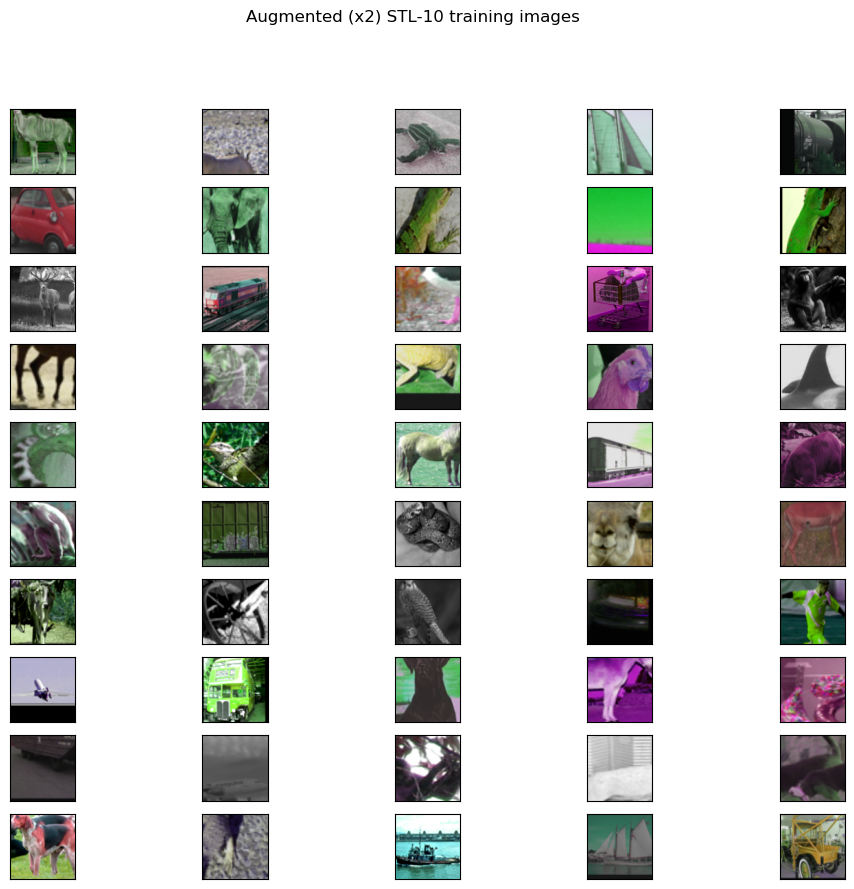

In [14]:
# Visualize MoCo-v2 augmented images train images-
plt.figure(figsize = (12, 10))

for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.imshow(x2_vis[i])
    # get current axes-
    ax = plt.gca()

    # hide x-axis-
    ax.get_xaxis().set_visible(False)

    # hide y-axis-
    ax.get_yaxis().set_visible(False)

plt.suptitle("Augmented (x2) STL-10 training images")
plt.show()